In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()

#Turning the dataset into a table
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"] = iris.target
iris_data.head()

# Making the names consistent in the dataset
iris_data.rename(columns = {'sepal length (cm)':'sepal_length','sepal width (cm)': 'sepal_width', 'petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)
# Adding a column to name the species
iris_data["target_names"] = iris.target
iris_data["target_names"].replace({0: 'setosa', 1:'versicolor',2:'virginica'}, inplace=True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [2]:
data = iris_data[['sepal_length','petal_length','petal_width']]
data.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [3]:
from sklearn.cluster import KMeans

# Training the K-Means with the dataset and fit it.
model = KMeans(n_clusters=2, max_iter=1000)
model.fit(data)
print(model, end="\n\n")
print("Centroids: \n" + str(model.cluster_centers_))


KMeans(max_iter=1000, n_clusters=2)

Centroids: 
[[6.31458333 4.97395833 1.703125  ]
 [5.00555556 1.5962963  0.3037037 ]]


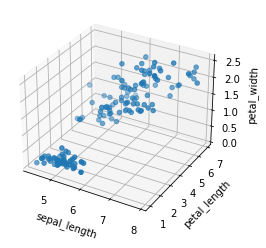

In [4]:
# Plotting the numerous features in a multidimensional graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["sepal_length"],
           data["petal_length"],
           data["petal_width"],)
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')
plt.show()

In [13]:
# Dropping one column to plot a 2D graph and re-train the model
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=1000)
pred = model.fit_predict(data.drop(columns=["sepal_length"]))
print(model, end="\n\n")
print("Centroids: \n" + str(model.cluster_centers_))

KMeans(max_iter=1000, n_clusters=2)

Centroids: 
[[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


Text(0, 0.5, 'petal_width')

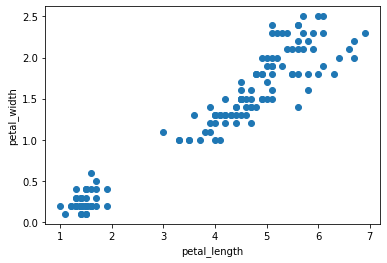

In [14]:
# Plotting the data for petal_length and petal_width
plt.scatter(x=data["petal_length"],y=data["petal_width"])
plt.xlabel("petal_length")
plt.ylabel("petal_width")

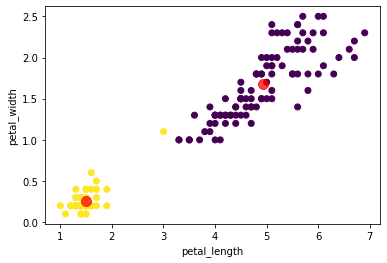

In [15]:
# The position of the centroids using KMeans
plt.scatter(x=data["petal_length"],y=data["petal_width"], c=pred)
centers = model.cluster_centers_
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.scatter(centers[:,0], centers[:,1], c='Red', s=100, alpha=0.75);


Centroids:
[[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


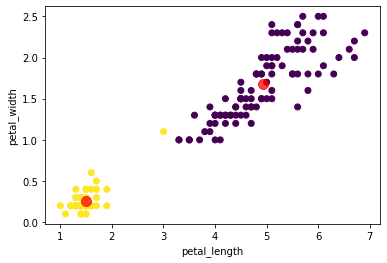

In [19]:
# Training K-means with 3 clusters to see where the centroids are placed.
plt.scatter(x=data["petal_length"],y=data["petal_width"], c=pred)
centers = model.cluster_centers_
plt.xlabel("petal_length")
plt.ylabel("petal_width")
print("Centroids:\n"+str(model.cluster_centers_))
plt.scatter(centers[:,0], centers[:,1], c='Red', s=100, alpha=0.75)

C:\Users\olatu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


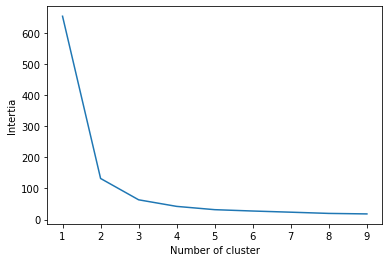

In [22]:
# Elbow Chart for 3 features
intertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data)
    # Inertia: Sum of distances of samples to their closest cluster center
    intertia[k] = kmeans.inertia_
plt.figure()
plt.plot(list(intertia.keys()), list(intertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Intertia")
plt.show()










C:\Users\olatu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


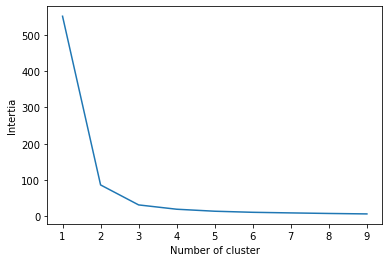

In [23]:
# Elbow Chart for 2 features
intertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data.drop(columns=["sepal_length"]))
    # Inertia: Sum of distances of samples to their closest cluster center
    intertia[k] = kmeans.inertia_
plt.figure()
plt.plot(list(intertia.keys()), list(intertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Intertia")
plt.show()

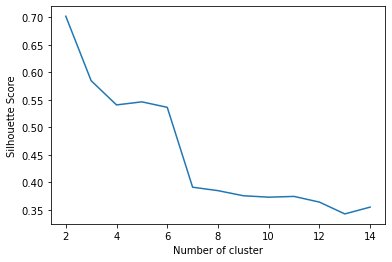

In [25]:
# Silhouette score to observe how good each cluster is
from sklearn.metrics import silhouette_score

score = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data)
    pred = kmeans.labels_
    score[k] = silhouette_score(data, pred)
plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

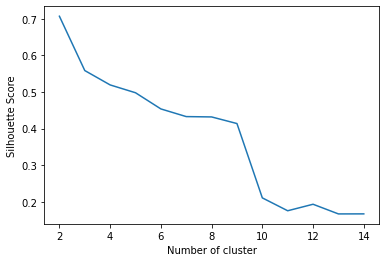

In [26]:
# Silhouette score for two features
score = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data.drop(columns=["sepal_length"]))
    pred = kmeans.labels_
    score[k] = silhouette_score(data, pred)
plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

KMeans(max_iter=1000, n_clusters=3)

Centroids: 
[[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


Text(0, 0.5, 'petal_width')

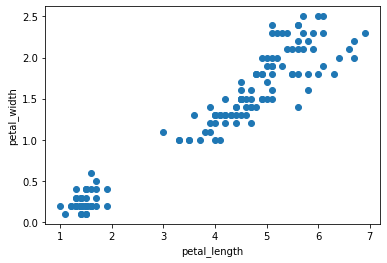

In [28]:
# Using the optimal value of k
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=1000)
pred = model.fit_predict(data.drop(columns=["sepal_length"]))
print(model, end="\n\n")
print("Centroids: \n" + str(model.cluster_centers_))

# Plotting the data for petal_length and petal_width
plt.scatter(x=data["petal_length"],y=data["petal_width"])
plt.xlabel("petal_length")
plt.ylabel("petal_width")